# Clause WITH et Vues

## Sous-requêtes avec WITH
Les requêtes SQL peuvent devenir complexe si on associe les opérations mathémathiques, les fonctions d'agrégat et les jointures.

La clause WITH permet de créer des sous-requêtes qui renvoient un résultat temporaire.

Dans l'exemple de notre base learning, on souhaite calculer la panier moyen de chaque client.

Procédons par étape :

1 - calculer le prix total d'une transaction quantity x unit_price

2 - calculer la moyenne des transactions par client

3 - associer la moyenne des transactions avec les informations du client

### Calculer le prix total des transactions

On calcule le prix total des transactions.

`SELECT *, quantity*unit_price AS total_price FROM transaction;`

## Calculer la moyenne des transactions

Pour calculer la moyenne des transactions, on a besoin du prix total, un résultat qu'on trouve dans la requête précédente.

On va ainsi mettre la requête précédente dans une clause WITH.

`WITH transaction_new AS (SELECT *, quantity*unit_price AS total_price FROM transaction)
SELECT client_id, avg(total_price) AS avg_total_price FROM transaction_new
GROUP BY client_id;`

## Associer les informations clients

On a désormais un résulat intermédiaire de deux colonnes, le client_id et son panier moyen.

Nous voulons exploiter ce résultat et lui associer les informations de la table `client`.

Encore une fois, on va avoir recours à la clause WITH.

`WITH transaction_new AS (SELECT *, quantity*unit_price AS total_price FROM transaction),
avg_basket AS (SELECT client_id, avg(total_price) AS avg_total_price FROM transaction_new
GROUP BY client_id)
SELECT * from avg_basket INNER JOIN client ON
avg_basket.client_id = client.id;`

NB : Seuls la première clause WITH porte le mot WITH, les autres clauses portent uniqument un ALIAS.

NB2 : Les clauses WITH sont séparées par une `,`.

## les vues - des tables virtuelles

La clause WITH permet de créer un résultat temporaire. C'est-à-dire qu'il faut réécrire à chaque fois la requête pour accéder à ce résultat.

Les vues permettent de conserver les résultats. Ce sont des tables virtuelles, les données ne sont pas stockées. Les vues se mettent à jour automatiquement lorsque des données sont ajoutées, modifiées ou supprimées de la base de données.

Reprenons l'exemple précédent de la clause WITH. Nous allons complexifier encore la requête.

On veut créer une vue avec les clients premium qui ont un panier moyen supérieur à 500 en ajoutant une clause HAVING.

`CREATE VIEW premium_client AS (WITH transaction_new AS (SELECT *, quantity*unit_price AS total_price FROM transaction),
avg_basket AS (SELECT client_id, avg(total_price) AS avg_total_price FROM transaction_new
GROUP BY client_id
HAVING  avg(total_price) > 500)
SELECT * from avg_basket INNER JOIN client ON
avg_basket.client_id = client.id);`

La vue apparaît désormais dans l'explorateur d'objets.

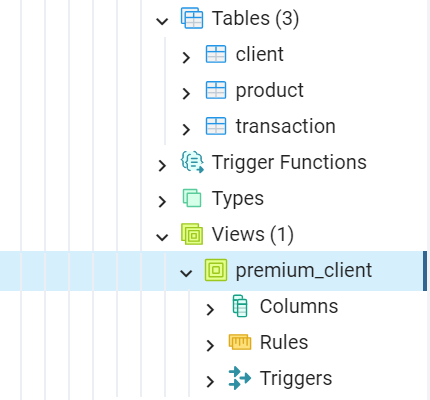

Nous pouvons accéder au résultat de cette requête complexe avec une ligne.

`SELECT * from premium_client;`